In [81]:
import torchvision.transforms as transforms
import pandas as pd

dfPath = r'labeled_train_set.csv'
trainData = pd.read_csv(dfPath)
df = pd.DataFrame(trainData)
df_2 = df.iloc[:, 1:].values
#transform values to pytorch tensor
tensor_data = torch.tensor(df_2)
#make them have values between 0 to 1
normalized_tensor_data = tensor_data.float() / 255.0

print(normalized_tensor_data[0])



tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [72]:
import torch
# Make a loader to enable us to iterate with batches of 32
loader = torch.utils.data.DataLoader(dataset = normalized_tensor_data, batch_size = 32, shuffle = True)

In [45]:
# design our autoencoder

# 28*28 -> 200 ->100 -> 50 -> 20 -> 10 -> 20 -> 50 -> 100 -> 200 -> 28*28
# Takes torch neural network as super set
class AE(torch.nn.Module):
# Inherits init from torch.nn
    def __init__(self):
        super().__init__()

    # Define encoder as sequence of layers you want and their activation functions
    # We use ReLU as our activation function because it performed well in our last exercise, and 
    # It often performs well in neural networks. Additionally, due to its computational efficiency, it is a preferred choice

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 200),
            torch.nn.ReLU(),
            torch.nn.Linear(200, 100),
            torch.nn.ReLU(),
            torch.nn.Linear(100, 50),
            torch.nn.ReLU(),
            torch.nn.Linear(50, 20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, 10)
        )

    # The decoder is the reverse of the encoder, and it has the same structure. 
    # Since we normalized the data, we use a sigmoid function at the end of the decoder to predict numbers within the range of [0, 1].

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(10, 20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, 50),
            torch.nn.ReLU(),
            torch.nn.Linear(50, 100),
            torch.nn.ReLU(),
            torch.nn.Linear(100, 200),
            torch.nn.ReLU(),
            torch.nn.Linear(200, 28 * 28),
            torch.nn.Sigmoid()
        )
    # We show the series of actions taken in our Autoencoder
    # First we encode and then we decode
    # The output is our answer

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [48]:

model = AE()

# Create an optimzer. we used adams as it's so widely used in nn
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3,  weight_decay = 1e-8)

# Beacuse our data is some how continues we use MSE as loss function

loss_function = torch.nn.MSELoss()

In [58]:
epochs = 50

for epoch in range(epochs):
    loss = 0
    for batch_features in loader:
        # Reshape each batch
        batch_features = batch_features.reshape(-1, 28*28)
        
        # Reset the gradients for the new computations
        optimizer.zero_grad()
        
        # Calculate the output of our encoder
        outputs = model(batch_features)
        
        # Compute loss
        loss = loss_function(outputs, batch_features)
        
        # Perform backpropagation
        loss.backward()
        
        # Update parameters
        optimizer.step()
        

        loss += loss.item()
    
    # Compute the epoch training loss
    loss = loss / len(loader)
    #print loss for 10*i th epoch
    if(epoch%10 == 9 or epoch == 0):
    # Display the epoch training loss
        print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/50, loss = 0.000053
epoch : 10/50, loss = 0.000050
epoch : 20/50, loss = 0.000048
epoch : 30/50, loss = 0.000058
epoch : 40/50, loss = 0.000053
epoch : 50/50, loss = 0.000060


In [ ]:
# Architectures and parameters are discussed in the report

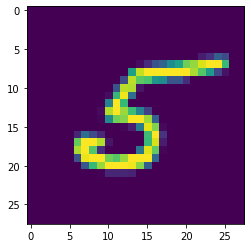

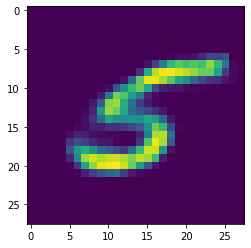

In [76]:
import matplotlib.pyplot as plt

image = next(iter(loader))
for i, item in enumerate(image):
    # Reshape the array for plotting
    item = item.reshape(-1, 28, 28)
    
    # Convert the tensor to a NumPy array
    item_np = item.detach().numpy()
    
    # Plot the image
    plt.imshow(item_np[0])
    plt.show()
    
    # Break out of the loop after plotting the first image
    break

for i, item in enumerate(model(image)):
    item = item.reshape(-1, 28, 28)
    
    # Convert the tensor to a NumPy array
    item_np = item.detach().numpy()
    
    # Plot the image
    plt.imshow(item_np[0])
    plt.show()
    break
# As you can see, after using the encoder, we obtained a significantly improved representation of the digits.
# It can be considered as a denoising process. 
# Therefore, utilizing the autoencoder before classification assists in extracting enhanced features.

In [86]:
# Now we wanna apply the encoder on our data
import numpy as np

# Encode the data
encoded_data = model.encoder(normalized_tensor_data)

# Convert to NumPy arrays
encoded_data_np = encoded_data.detach().numpy()
labels = df['label']

# Concatenate encoded data and labels
data_with_labels = np.hstack((labels.values.reshape(-1, 1), encoded_data_np))

# Create a DataFrame
column_names = ['label'] + [f'feature{i+1}' for i in range(encoded_data_np.shape[1])]
df_encoded = pd.DataFrame(data_with_labels, columns=column_names)

# Save as CSV
df_encoded.to_csv('encoded_data.csv', index=False)

# Now we have our new features in a new csv called encoded_data.csv and we will use it for classification
# The advantages will be discussed in the report

In [91]:
# PART II

# Import what's needed
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold

# Load the labeled data
df = pd.read_csv('encoded_data.csv')

# Separate the features and labels
X = df.iloc[:, 1:].values
y = df['label'].values
best_score = 0
for hidden_layer_size in [(100,), (100, 25), (80, 50, 20)]:
    for activations in ['relu', 'logistic', 'tanh', 'identity']:
        for learning_rate in ['constant','adaptive']:
            print(i)
            i = i + 1
            mlp = MLPClassifier(hidden_layer_sizes = hidden_layer_size, activation = activations, learning_rate = learning_rate, max_iter=1000)
            scores = cross_val_score(mlp, X, y, cv=5)
            average_score = scores.mean()

            if average_score > best_score:
                best_score = average_score
                best_params = {'hidden' : hidden_layer_size, 'act':activations, 'learn':learning_rate}

1
2
3


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


4


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


5
6
7
8
9
10
11


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


12


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


13
14
15
16
17
18
19


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


20


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


21
22
23
24


In [94]:
print(best_score)
print(best_params)

0.9501111111111111
{'hidden': (100,), 'act': 'relu', 'learn': 'adaptive'}


In [101]:
best_mlp = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu'
                         , learning_rate = 'adaptive'
                         , max_iter=1000)
# Now it's time to train the best model on our training set and then test in on our test set

from sklearn.metrics import accuracy_score, confusion_matrix



# we should change our test data to a 10-dimension data using our encoder
df = pd.read_csv('test_set.csv')

# Separate the features and labels
X_test1 = df.iloc[:, 1:].values
y_test = df['label'].values


#transform values to pytorch tensor
tensor_X = torch.tensor(X_test1).float()/255.0
X_encoded_test = model.encoder(tensor_X)
X_test = X_encoded_test.detach().numpy()

best_mlp.fit(X, y)
print('Training done')

y_pred = best_mlp.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

Training done


In [108]:
print("For Test Data")
print("Accuracy : " , accuracy)
print(confusion_mtx)
print("For Train Data")
y_pred2 = best_mlp.predict(X)
accuracy2 = accuracy_score(y, y_pred2)
confusion_mtx2 = confusion_matrix(y_test, y_pred)
print("Accuracy : " , accuracy2)
print(confusion_mtx2)

For Test Data
Accuracy :  0.9314
[[ 954    0    1    1    0    7   11    0    2    4]
 [   0 1112    3    1    1    1    3    2   11    1]
 [   7    1  968   18    5    3    4    8   16    2]
 [   1    1   13  934    1   10    1    9   36    4]
 [   2    1    3    1  918    0   12    3    4   38]
 [  14    1    3   26    6  792    7    1   36    6]
 [  12    4    0    0   12   10  914    1    1    4]
 [   0    6   13    7    9    2    1  940    7   43]
 [   1    3    4   34    7   44    1    5  866    9]
 [   2    8    3   12   37    6    4    7   14  916]]
For Train Data
Accuracy :  0.9728333333333333
[[ 954    0    1    1    0    7   11    0    2    4]
 [   0 1112    3    1    1    1    3    2   11    1]
 [   7    1  968   18    5    3    4    8   16    2]
 [   1    1   13  934    1   10    1    9   36    4]
 [   2    1    3    1  918    0   12    3    4   38]
 [  14    1    3   26    6  792    7    1   36    6]
 [  12    4    0    0   12   10  914    1    1    4]
 [   0    6   13   

In [ ]:
# part III
# because our data is so sparse we perform dimension reduction using autoencoders

from sklearn.cluster import KMeans
df = pd.read_csv('test_set.csv')

# Separate the features and labels
X_test1 = df.iloc[:, 1:].values
y_test = df['label'].values


#transform values to pytorch tensor
tensor_X = torch.tensor(X_test1).float()/255.0
X_encoded_test = model.encoder(tensor_X)
X_test = X_encoded_test.detach().numpy()


# Step 2: Prepare your data
# Assuming you have your data stored in a variable called 'data'

# Step 3: Choose the number of clusters (K)
num_clusters = 3

# Step 4: Create the K-means model
kmeans = KMeans(n_clusters=num_clusters)

# Step 5: Train the model
kmeans.fit(data)

# Step 6: Obtain cluster labels
cluster_labels = kmeans.labels_

# Print the cluster labels
print("Cluster Labels:")
print(cluster_labels)
